# Homework 2

I converted my data to datetime in a separate notebook. Since I am working with reforecast data from July for 2011-2017, I do not have 12 subplots, but instead 7 for each variable (14 subplots total).

In [2]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt

## Surface Temperature Climatology: July 2011-2017

In [3]:
path = '/scratch/ldoyle4/p7/'

In [4]:
years = ['2011','2012','2013','2014','2015','2016','2017']

In [5]:
files = [f'{path}p7_ts_{year}0701.nc' for year in years]
files

['/scratch/ldoyle4/p7/p7_ts_20110701.nc',
 '/scratch/ldoyle4/p7/p7_ts_20120701.nc',
 '/scratch/ldoyle4/p7/p7_ts_20130701.nc',
 '/scratch/ldoyle4/p7/p7_ts_20140701.nc',
 '/scratch/ldoyle4/p7/p7_ts_20150701.nc',
 '/scratch/ldoyle4/p7/p7_ts_20160701.nc',
 '/scratch/ldoyle4/p7/p7_ts_20170701.nc']

In [6]:
ds = xr.open_mfdataset(files, combine='nested', concat_dim='steps')

Next, select the data for the lat and long for CONUS

In [7]:
ds = ds.sel(longitude=slice(235,300),latitude=slice(50,23))

Perform climatology. Since I only have 1 month per year, I have it grouped by year, so that each July is averaged, giving me 7 groups, and thus 7 subplots.

In [8]:
ds_climo = ds.groupby('steps.year').mean()

In [9]:
ds_climo

<xarray.Dataset>
Dimensions:    (longitude: 261, latitude: 109, year: 7)
Coordinates:
  * longitude  (longitude) float64 235.0 235.2 235.5 235.8 ... 299.5 299.8 300.0
  * latitude   (latitude) float64 50.0 49.75 49.5 49.25 ... 23.5 23.25 23.0
  * year       (year) int64 2011 2012 2013 2014 2015 2016 2017
Data variables:
    ts         (year, latitude, longitude) float64 dask.array<chunksize=(1, 109, 261), meta=np.ndarray>

Plot the climatology in contour subplots, defining the axes for latitude and longitude, and a colorbar which shows the scale of variability with the correct units.

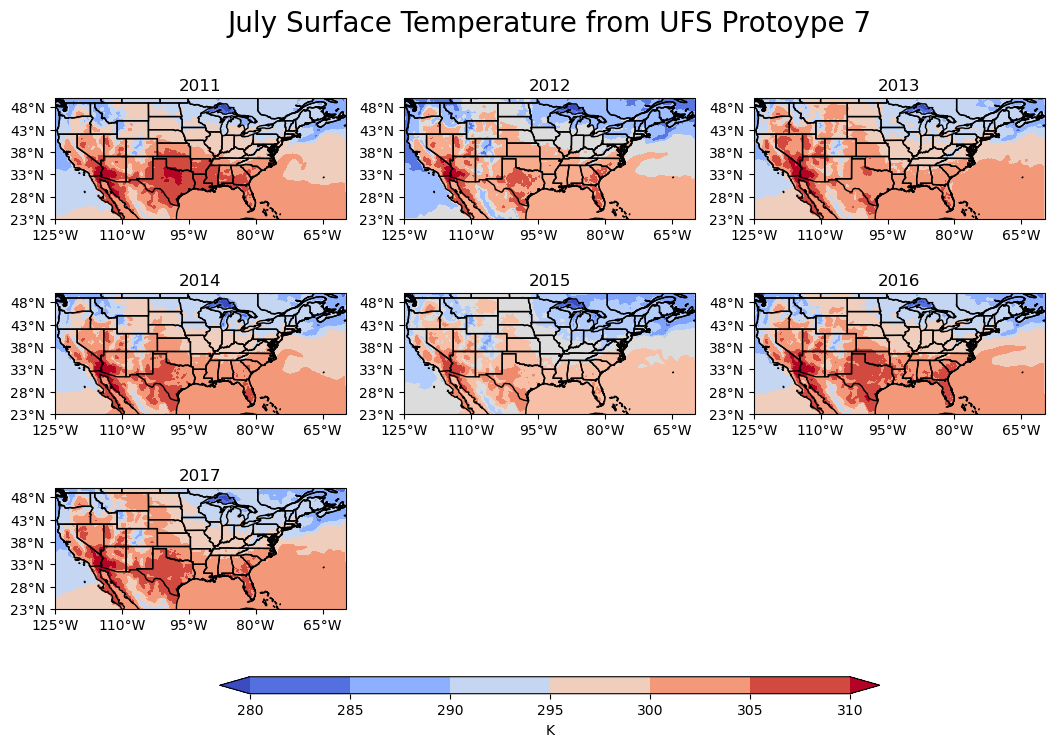

In [19]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,year in enumerate(ds_climo['year']):

        # Select the season
        data=ds_climo['ts'].sel(year=year)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_climo['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_climo['latitude'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-125,-50,15), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(23,51,5), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(year.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        #ax.add_feature(cfeature.COASTLINE)
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('July Surface Temperature from UFS Protoype 7',fontsize=20)

#fig.delaxes(axs[2][1])
#fig.delaxes(axs[2][2])
axs[7].set_axis_off()
axs[8].set_axis_off()

Now we will repeat the steps for the precipitation data.

## Precipitation Climatology: July 2011-2017

In [20]:
path1 = '/scratch/ldoyle4/p7/'

In [21]:
years = ['2011','2012','2013','2014','2015','2016','2017']

In [22]:
files1 = [f'{path1}p7_precip_{year}0701.nc' for year in years]
files1

['/scratch/ldoyle4/p7/p7_precip_20110701.nc',
 '/scratch/ldoyle4/p7/p7_precip_20120701.nc',
 '/scratch/ldoyle4/p7/p7_precip_20130701.nc',
 '/scratch/ldoyle4/p7/p7_precip_20140701.nc',
 '/scratch/ldoyle4/p7/p7_precip_20150701.nc',
 '/scratch/ldoyle4/p7/p7_precip_20160701.nc',
 '/scratch/ldoyle4/p7/p7_precip_20170701.nc']

In [23]:
ds1 = xr.open_mfdataset(files1, combine='nested', concat_dim='steps')

In [24]:
ds1 = ds1.sel(longitude=slice(235,300),latitude=slice(50,23))

In [25]:
ds1_climo = ds1.groupby('steps.year').mean()

In [26]:
ds1_climo

<xarray.Dataset>
Dimensions:    (longitude: 261, latitude: 109, year: 7)
Coordinates:
  * longitude  (longitude) float64 235.0 235.2 235.5 235.8 ... 299.5 299.8 300.0
  * latitude   (latitude) float64 50.0 49.75 49.5 49.25 ... 23.5 23.25 23.0
  * year       (year) int64 2011 2012 2013 2014 2015 2016 2017
Data variables:
    precip     (year, latitude, longitude) float64 dask.array<chunksize=(1, 109, 261), meta=np.ndarray>

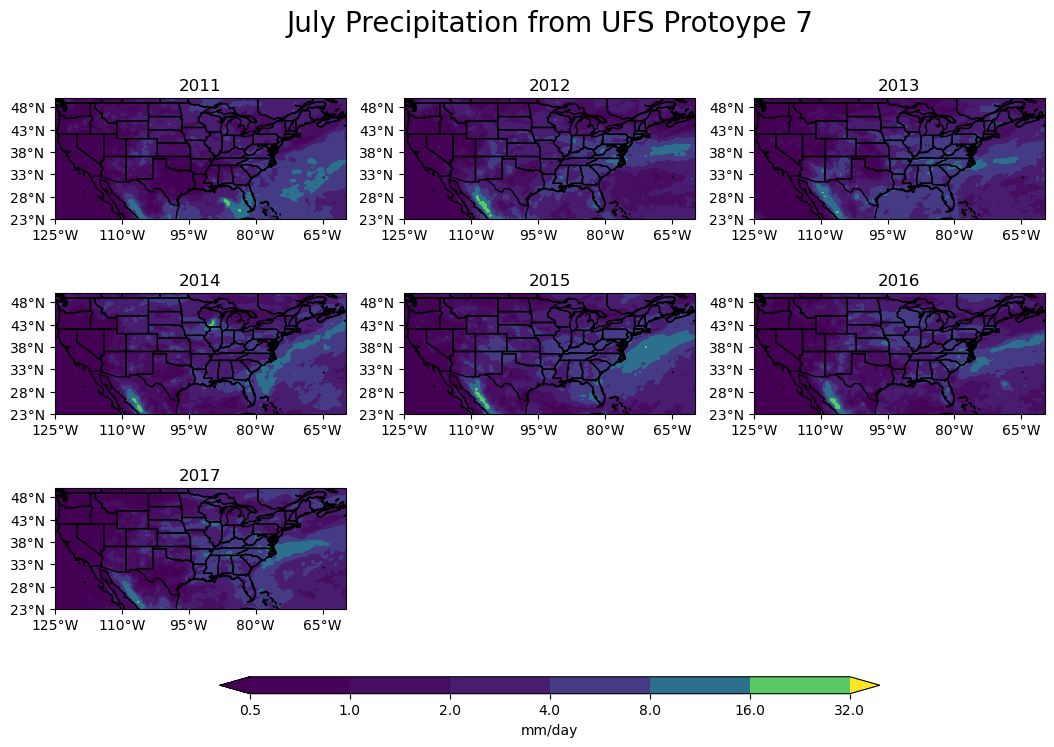

In [33]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,year in enumerate(ds1_climo['year']):

        # Select the season
        data=ds1_climo['precip'].sel(year=year)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds1_climo['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,ds1_climo['latitude'],data, levels=[0.5, 1, 2, 4, 8, 16, 32],
                          transform = ccrs.PlateCarree(),
                          cmap='viridis',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-125,-50,15), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(23,51,5), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(year.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('July Precipitation from UFS Protoype 7',fontsize=20)

axs[7].set_axis_off()
axs[8].set_axis_off()

# Discussion of Climatology:

The results from the climatology are interesting. In 2011, the majority of the south of the US was very hot (most notably Texas), with an average of about 90 F to 100 F, and high precipitation in the southeast (most notably Florida). In 2012, it's a bit hotter in Florida on average, and the midwest is a bit colder than the previous year, and high precipitation on average between 5 to 7.5 mm per day. In 2013, it's about the same as 2012 temperature-wise, but higher in precipitation than 2012, especially noticeable in along the East Coast. In 2014, it looks closer to 2011, but a higher precipitation around Wisconsin specifically. In 2015, everywhere seems to be a bit cooler on average, by comparison, and higher precipitation around Florida and off the East Coast. To really see the significance, I'd need to calculate the anomalies. In 2016, it's closer to 2014, without the precipitation in Wisconsin. And in 2017, it's about the same temperature-wise, but much higher precipitation off the East Coast and stretching in central US. 

In 2015, while the average was high, the daily maximum was actually lower, one of the coolest on record. https://www.ncei.noaa.gov/access/monitoring/monthly-report/national/201507. It was cooler in the central US, while warmer in the NW and SE. 
https://www.ncei.noaa.gov/access/monitoring/monthly-report/synoptic/201507. "El Niño-enhanced convection and tropical cyclones over the eastern equatorial Pacific funneled moisture into the Southwestern CONUS, contributing to above-normal precipitation and below-normal temperatures in between these high pressure centers. Cool fronts and low pressure systems, moving along the storm track east of the Rockies, brought above-normal precipitation and cooler-than-normal temperatures to much of the Central Plains to Appalachians."

In 2014, there was an active jet stream with high amplitude meridional flow. "Cooler-than-normal temperatures dominated the central and eastern U.S. beneath a strong upper-level long-wave trough, while warmer- and drier-than-normal weather prevailed across much of the West due to an intense upper-level ridge." https://www.ncei.noaa.gov/access/monitoring/monthly-report/synoptic/201407. "Above-normal precipitation fell across much of the Southwest and Northeast and parts of the Southern Plains and East Coast. Precipitation was below normal across the rest of the West and much of the Plains, with patchy dryness from the Midwest to the Southeast" which could explain that spot in Wisconsin. 
